# Line Plot Gallery

Line plots are used for visualizing sequential data like daily trends or event impact analysis. They're ideal for time-based sequences or ordered data points that show progression over time or other sequential measures.

Line plots excel at:
- **Sequential Visualization**: Display trends over time or ordered sequences like "days since event"
- **Multiple Series Comparison**: Compare metrics across different categories with separate lines
- **Event Impact Analysis**: Visualize how metrics change before and after important events
- **Highlighting Key Trends**: Emphasize specific lines while keeping others as context

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from pyretailscience.plots import line

## Basic Line Plot

Create a basic line plot from a DataFrame with specified x and y columns.

---

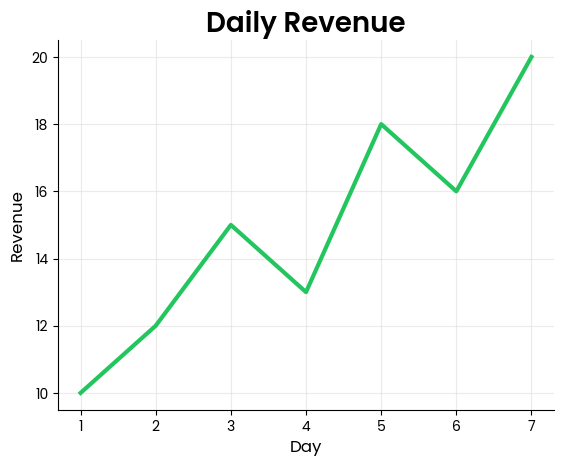

In [ ]:
# Create simple line data for clean thumbnail
daily_data = pd.DataFrame(
    {
        "day": range(1, 8),
        "revenue": [10, 12, 15, 13, 18, 16, 20],
    },
)

line.plot(
    daily_data,
    x_col="day",
    value_col="revenue",
    title="Daily Revenue",
    x_label="Day",
    y_label="Revenue",
)
plt.show()

## Plotting a Series

Plot a pandas Series directly using its index as the x-axis.

---

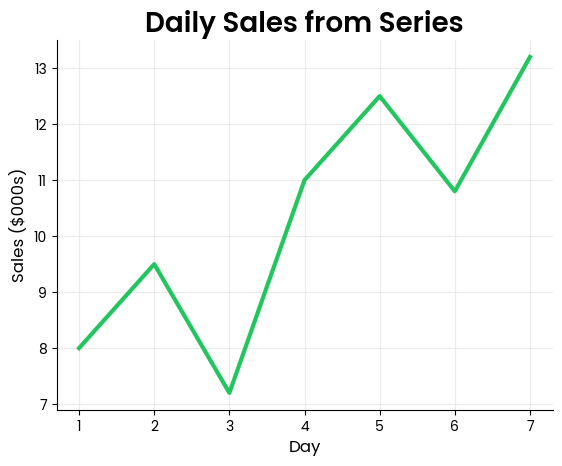

In [ ]:
# Create sample sales series
sales_series = pd.Series(
    [8, 9.5, 7.2, 11, 12.5, 10.8, 13.2],
    index=range(1, 8),
    name="Daily Sales",
)

line.plot(
    sales_series,
    title="Daily Sales from Series",
    x_label="Day",
    y_label="Sales ($000s)",
)
plt.show()

## Multiple Lines with Group Column

Create separate lines for each category using the `group_col` parameter.

---

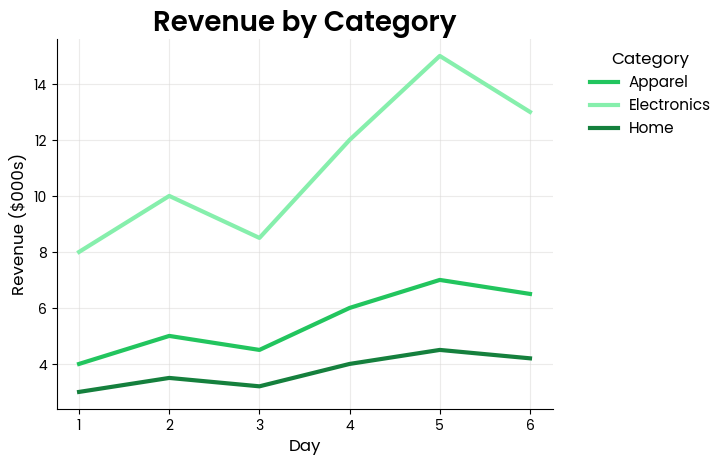

In [ ]:
# Create sample data with multiple product categories
# fmt: off
category_data = pd.DataFrame(
    {
        "day": [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6],
        "category": ["Electronics", "Apparel", "Home"] * 6,
        "revenue": [
            8, 4, 3,      # Day 1
            10, 5, 3.5,   # Day 2
            8.5, 4.5, 3.2,  # Day 3
            12, 6, 4,     # Day 4
            15, 7, 4.5,   # Day 5
            13, 6.5, 4.2, # Day 6
        ],
    },
)
# fmt: on

line.plot(
    category_data,
    x_col="day",
    value_col="revenue",
    group_col="category",
    title="Revenue by Category",
    x_label="Day",
    y_label="Revenue ($000s)",
    legend_title="Category",
    move_legend_outside=True,
)
plt.show()

## Multiple Value Columns

Plot multiple metrics simultaneously by passing a list to `value_col`. Note: This cannot be combined with `group_col`.

---

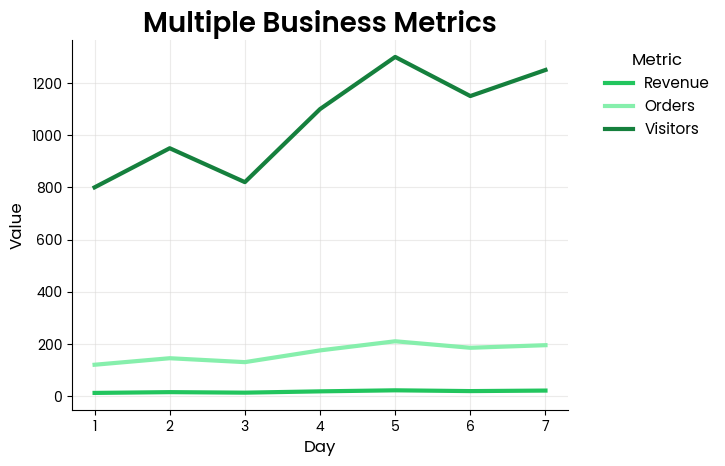

In [ ]:
# Create sample data with multiple metrics
metrics_data = pd.DataFrame(
    {
        "day": range(1, 8),
        "Revenue": [12, 15, 13, 18, 22, 19, 21],
        "Orders": [120, 145, 130, 175, 210, 185, 195],
        "Visitors": [800, 950, 820, 1100, 1300, 1150, 1250],
    },
)

line.plot(
    metrics_data,
    x_col="day",
    value_col=["Revenue", "Orders", "Visitors"],
    title="Multiple Business Metrics",
    x_label="Day",
    y_label="Value",
    legend_title="Metric",
    move_legend_outside=True,
)
plt.show()

## Index-Based Plotting

Plot using the DataFrame index as the x-axis by omitting the `x_col` parameter.

---

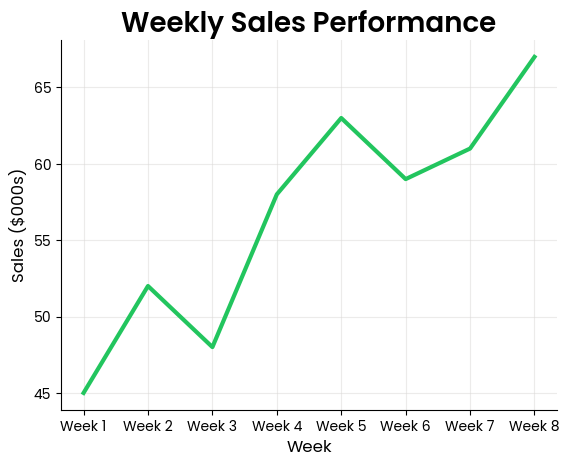

In [ ]:
# Create sample data with meaningful index
weeks_data = pd.DataFrame(
    {
        "sales": [45, 52, 48, 58, 63, 59, 61, 67],
    },
)
weeks_data.index = [f"Week {i}" for i in range(1, 9)]

line.plot(
    weeks_data,
    value_col="sales",
    title="Weekly Sales Performance",
    x_label="Week",
    y_label="Sales ($000s)",
)
plt.show()

## Fill Missing Values

Use `fill_na_value` to handle missing data when using `group_col` creates a pivot table.

---

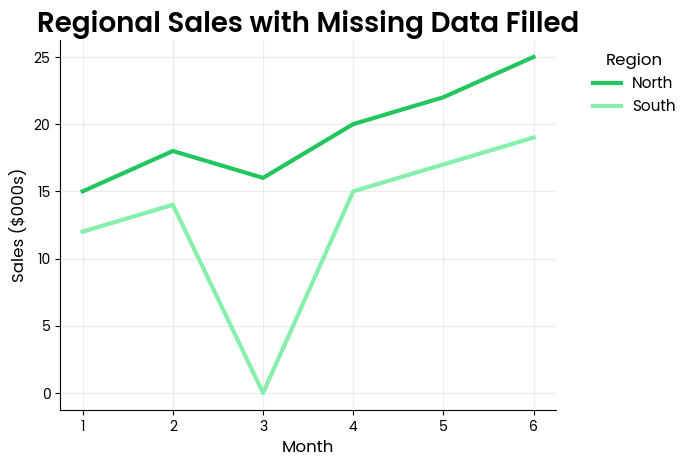

In [ ]:
# Create sample data with missing values in some categories
sparse_data = pd.DataFrame(
    {
        "month": [1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 6],
        "region": ["North", "South", "North", "South", "North", "North", "South", "North", "South", "North", "South"],
        "sales": [15, 12, 18, 14, 16, 20, 15, 22, 17, 25, 19],
    },
)

line.plot(
    sparse_data,
    x_col="month",
    value_col="sales",
    group_col="region",
    fill_na_value=0,  # Fill missing months with 0
    title="Regional Sales with Missing Data Filled",
    x_label="Month",
    y_label="Sales ($000s)",
    legend_title="Region",
    move_legend_outside=True,
)
plt.show()

## Highlighting Specific Lines

Use the `highlight` parameter to emphasize specific lines while keeping others as muted context.

---

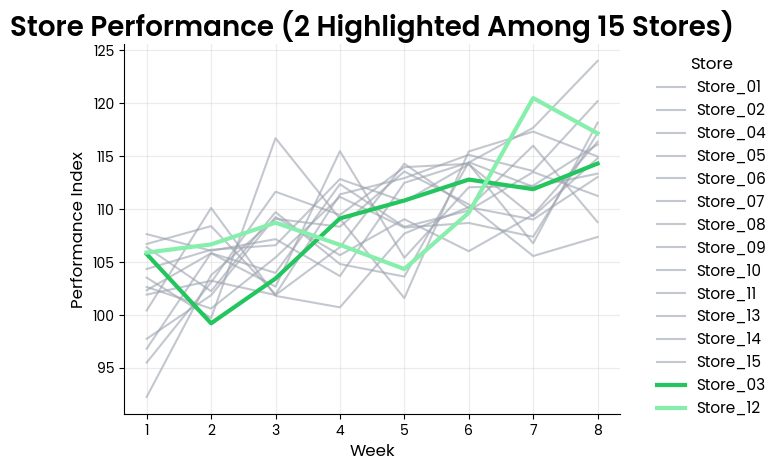

In [ ]:
# Create sample data with 15 different store locations (minimal code approach)
import numpy as np

rng = np.random.default_rng(42)
weeks = 8
# Generate 15 store names efficiently
store_names = [f"Store_{i:02d}" for i in range(1, 16)]

# Create data efficiently with minimal code
store_data = pd.DataFrame(
    [
        {"week": week, "store_name": store, "performance": 100 + rng.normal(week * 2, 5)}
        for week in range(1, weeks + 1)
        for store in store_names
    ],
)

line.plot(
    store_data,
    x_col="week",
    value_col="performance",
    group_col="store_name",
    highlight=["Store_03", "Store_12"],  # Highlight only 2 out of 15 stores
    title="Store Performance (2 Highlighted Among 15 Stores)",
    x_label="Week",
    y_label="Performance Index",
    legend_title="Store",
    move_legend_outside=True,
)
plt.show()